In [122]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.dates as mdates

sns.set(
    font="ABC Sans Nova"    
)

old_data = pd.read_csv(
    "./caseData.csv",
    usecols=[0, 1, 6, 7, 8, 9, 10, 11],
    parse_dates=["date"]
)

data = pd.DataFrame(
    columns=["week", "pcr", "rat", "new", "hospital", "icu", "ventilated", "dead"]
)

update_data = pd.read_csv(
    "./updates.csv"
)

date = pd.to_datetime("2022-09-09")

while date > pd.to_datetime("2021-08-05"):
    snapshot = old_data[
        (old_data.date <= date) &
        (old_data.date > date - pd.Timedelta(days=7))
    ]
    if len(snapshot) > 0:
        data.loc[len(data)] = [
            date,
            snapshot.pcr.sum(),
            snapshot.rat.sum(),
            snapshot.new.sum(),
            snapshot.iat[-1, 2],
            snapshot.iat[-1, 3],
            snapshot.iat[-1, 4],
            snapshot.dead.sum()
        ]
    else:
        data.loc[len(data)] = [
            date, 0, 0, 0, 0, 0, 0, 0
        ]

    date = date - pd.Timedelta(days=7)

date = pd.to_datetime("2022-09-16")

for i in update_data.index:
    index = len(data)
    data.at[index, "week"] = date + pd.Timedelta(days=(i * 7))

    for col in data.columns[1:]:
        data.at[index, col] = update_data.at[i, col]

data.to_csv("covidData.csv", index=False)

AttributeError: Line2D.set() got an unexpected keyword argument 'step'

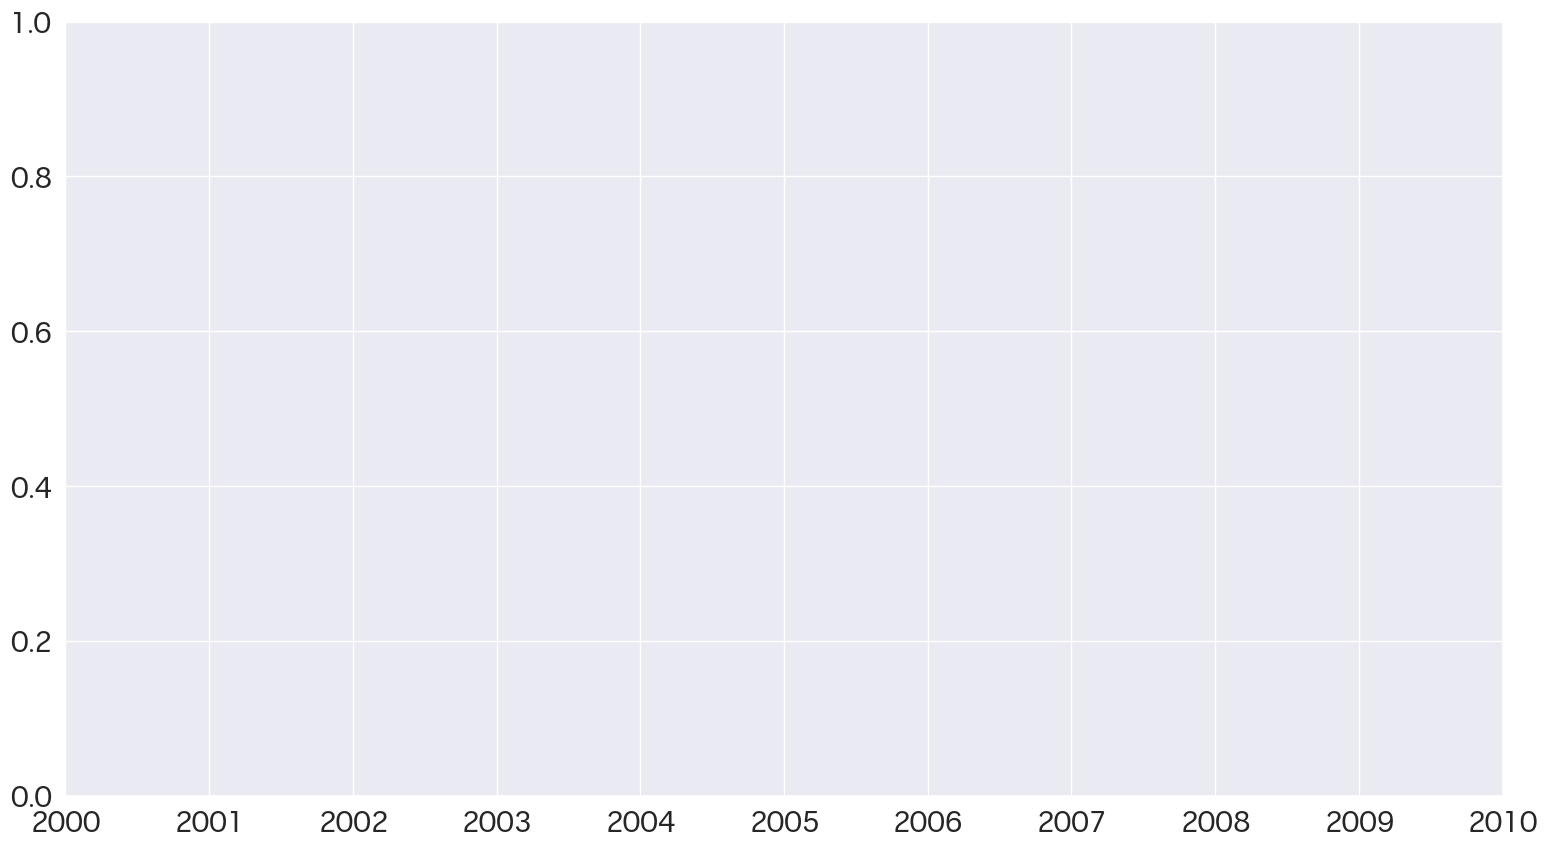

In [121]:
sns.set(
    font="ABC Sans Nova",
    font_scale=2
)

fig, ax = plt.subplots(
    figsize=(16, 9),
    tight_layout=True
)

chart_data = data[["week", "hospital"]]
# chart_data.columns = ["week", "PCR", "RAT"]
chart_data.plot(
    x="week",
    ax=ax,
    # kind="area",
    step="post",
    # legend=False
)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.yaxis.set_major_formatter(lambda x, p: f"{x:,.0f}")
plt.xlabel(None)
plt.ylabel(None)
plt.margins(0)
plt.title("Patients with COVID-19 in ACT hospitals", fontsize="large", fontweight="black")

